# var1

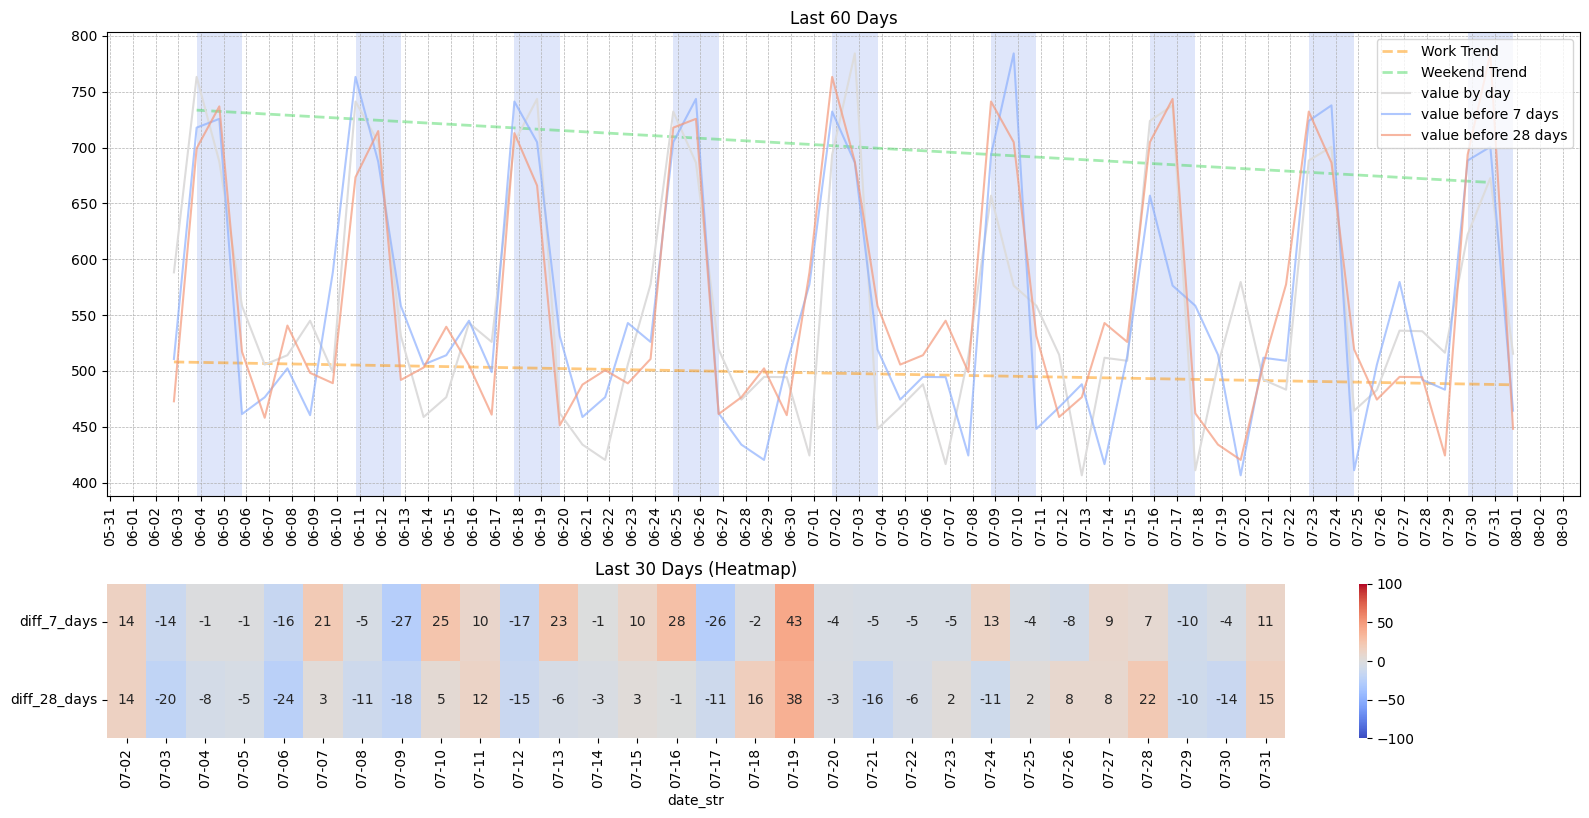

------------------------------------------------------------------------------------------------------------------------


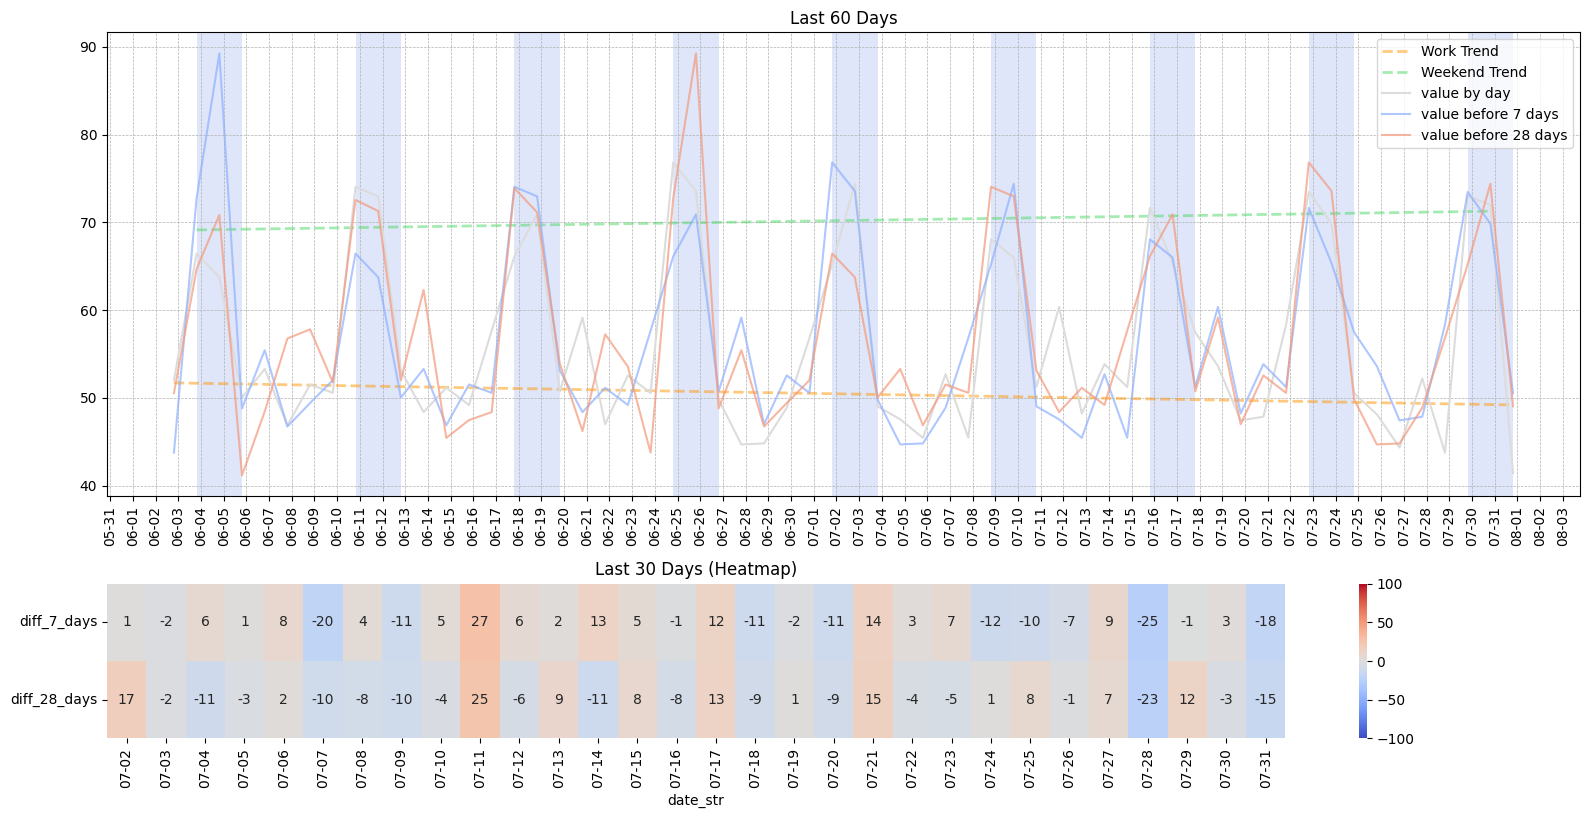

------------------------------------------------------------------------------------------------------------------------


In [1]:
# GPT-4 #iOS theme

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.colors as colors
from scipy.stats import linregress

# Create a date range for the last 90 days
date_range = pd.date_range(pd.Timestamp.today() - pd.Timedelta('90D'), pd.Timestamp.today())

# Groups
groups = ['group1', 'group2', 'group3', 'group4']

# Generate synthetic data
np.random.seed(42)
data = []
for date in date_range:
    weekday = date.weekday()
    for group in groups:
        base_amount = 500 if group == 'group1' else 400
        base_count = 50 if group == 'group1' else 40

        # Seasonal pattern (increased sales on weekends)
        seasonal_amount = 200 if weekday in [5, 6] else 0
        seasonal_count = 20 if weekday in [5, 6] else 0

        # Random noise
        noise_amount = np.random.normal(0, 50)
        noise_count = np.random.normal(0, 5)

        amount = base_amount + seasonal_amount + noise_amount
        count = base_count + seasonal_count + noise_count

        data.append((date, group, max(0, amount), max(0, count)))

# Create a DataFrame
df = pd.DataFrame(data, columns=['date', 'group', 'amount', 'count'])
df['weekday'] = df['date'].dt.day_name()
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])

# Define colors (iOS theme)
colors_ios = sns.color_palette("coolwarm", 7)

colors_trend = ['#FF9500', '#4CD964']

# Set date format
date_format = mdates.DateFormatter("%m-%d")

# Create a colormap for the heatmap
colormap = colors.LinearSegmentedColormap.from_list("", ["red", "white", "green"])

# Custom iOS theme colormap
colors_ios_theme = sns.color_palette("coolwarm", n_colors=256)  # Use a larger number of colors for a more distinct colormap
colormap_ios_theme = colors.LinearSegmentedColormap.from_list("iOS_Theme", colors_ios_theme)

# Iterate through groups
for group in groups[:1]:
    for value in ['amount', 'count']:
        group_df = df[df['group'] == group].copy()

        # Calculate the 7-day and 28-day differences for the full 90 days
        group_df['value_7_days_ago'] = group_df[value].shift(7)
        group_df['value_28_days_ago'] = group_df[value].shift(28)
        group_df['diff_7_days'] = (group_df[value] - group_df['value_7_days_ago']) / group_df['value_7_days_ago'] * 100
        group_df['diff_28_days'] = (group_df[value] - group_df['value_28_days_ago']) / group_df['value_28_days_ago'] * 100

        # Restrict to last 60 days for the first plot, removing any rows with NaN values
        group_60 = group_df.tail(60).copy()
        weekday_df = group_60[~group_60['is_weekend']]
        weekend_df = group_60[group_60['is_weekend']]
        x_weekday = mdates.date2num(weekday_df['date'])
        x_weekend = mdates.date2num(weekend_df['date'])

        group_30 = group_df.tail(30).copy()  # Separate last 30 days
        group_30['date_str'] = group_30['date'].map(lambda x: str(x)[5:10] )

        fig, axes = plt.subplots(2, 1, figsize=[16, 9], gridspec_kw={'height_ratios': [3, 1]})
        plt.title(f'{group.capitalize()}: {value.capitalize()}')

        # Grid, x-ticks, and highlight weekends
        for ax in axes[:1]:
            ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid
            ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set x-ticks every day
            ax.xaxis.set_major_formatter(date_format)  # Apply date format
            ax.tick_params(axis='x', rotation=90)  # Rotate x-ticks
            for date in group_60['date']:
                if date.weekday() in [5, 6]:
                    ax.axvspan(date, date + pd.Timedelta('1D'), facecolor=colors_ios[0], alpha=0.2)

        # Graph 1 - Trends
        def plot_trend(x, y, color, label):
            slope, intercept, _, _, _ = linregress(x, y)
            axes[0].plot(x, slope * x + intercept, label=label, linewidth=2, linestyle='--', alpha=0.5, color=color)

        plot_trend(x_weekday, weekday_df[value], colors_trend[0], 'Work Trend')
        plot_trend(x_weekend, weekend_df[value], colors_trend[1], 'Weekend Trend')

        # Graph 1 - Last 60 days
        axes[0].plot(group_60['date'], group_60[value], label='value by day', color=colors_ios[3])
        axes[0].plot(group_60['date'], group_60['value_7_days_ago'], label='value before 7 days', color=colors_ios[1], alpha=0.7)
        axes[0].plot(group_60['date'], group_60['value_28_days_ago'], label='value before 28 days', color=colors_ios[5], alpha=0.7)
        axes[0].set_title('Last 60 Days')
        axes[0].legend()


        # Graph 2 - Heatmap for last 30 days
        heatmap_data = group_30[['date_str', 'diff_7_days', 'diff_28_days']].set_index('date_str').T
        sns.heatmap(data=heatmap_data, cmap=colormap_ios_theme, ax=axes[1], annot=True, fmt=".0f", vmin=-100, vmax=100)
        axes[1].set_title('Last 30 Days (Heatmap)')
        #axes[1].xaxis.set_major_locator(mdates.DayLocator(interval=1))
        #axes[1].xaxis.set_major_formatter(date_format)
        axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)  # Rotate y-ticks to horizontal

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
        plt.show()
        print('-'*120)

# var2

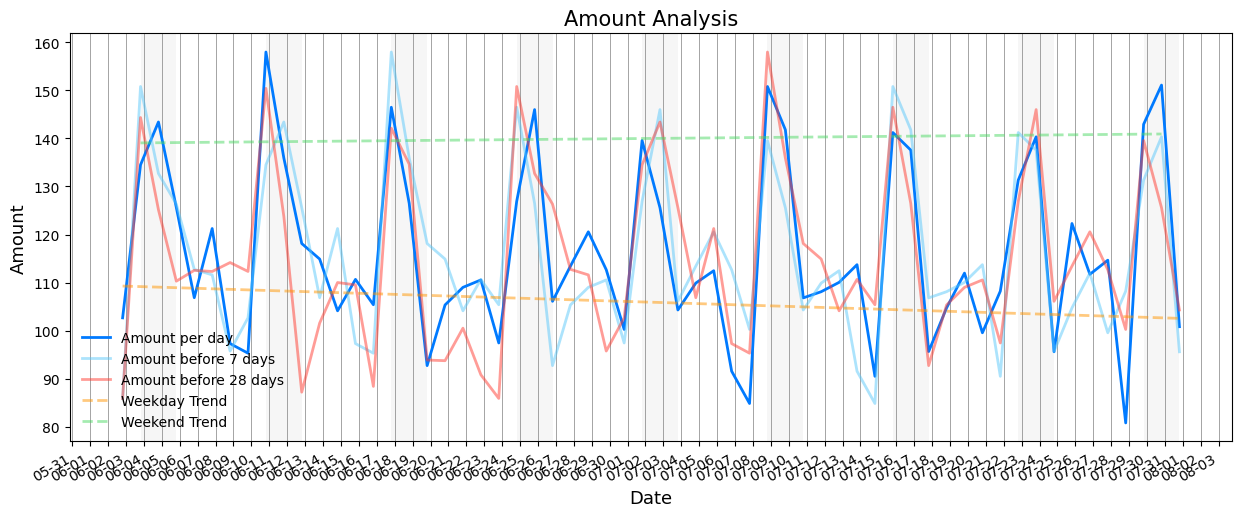

In [2]:
#iOS theme

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from scipy.stats import linregress

# Data
date_rng = pd.date_range(start=dt.datetime.now() - dt.timedelta(days=90), end=dt.datetime.now(), freq='D')
df = pd.DataFrame(date_rng, columns=['date'])
df['weekday'] = df['date'].dt.day_name()
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])
df['amount'] = 100 + np.random.randn(len(df)) * 10
df.loc[df['is_weekend'], 'amount'] += 50
df['amount'] += 10 * np.sin(df['date'].dt.dayofweek * 2 * np.pi / 7)
df['amount_7_days'] = df['amount'].shift(7)
df['amount_28_days'] = df['amount'].shift(28)
plot_df = df[df['date'] >= (dt.datetime.now() - dt.timedelta(days=60))]

# Plotting
plt.figure(figsize=(15,6), facecolor='white')

# iOS color palette
colors = ['#007AFF', '#5AC8FA', '#FF3B30', '#FF9500', '#4CD964']

for idx, row in plot_df.iterrows():
    if row['is_weekend']:
        plt.axvspan(row['date'], row['date'] + dt.timedelta(days=1), facecolor='lightgray', alpha=0.2)

plt.plot(plot_df['date'], plot_df['amount'], label='Amount per day', linewidth=2, color=colors[0])
plt.plot(plot_df['date'], plot_df['amount_7_days'], label='Amount before 7 days', linewidth=2, alpha=0.5, color=colors[1])
plt.plot(plot_df['date'], plot_df['amount_28_days'], label='Amount before 28 days', linewidth=2, alpha=0.5, color=colors[2])

def plot_trend(x, y, color, label):
    slope, intercept, _, _, _ = linregress(x, y)
    plt.plot(x, slope * x + intercept, label=label, linewidth=2, linestyle='--', alpha=0.5, color=color)

weekday_df = plot_df[~plot_df['is_weekend']]
weekend_df = plot_df[plot_df['is_weekend']]
x_weekday = mdates.date2num(weekday_df['date'])
x_weekend = mdates.date2num(weekend_df['date'])
plot_trend(x_weekday, weekday_df['amount'], colors[3], 'Weekday Trend')
plot_trend(x_weekend, weekend_df['amount'], colors[4], 'Weekend Trend')

plt.legend(fontsize='medium', frameon=False)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Amount', fontsize=13)
plt.title('Amount Analysis', fontsize=15)
plt.grid(axis='x', linestyle='-', linewidth=0.5, color='gray')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()

plt.show()

# var3

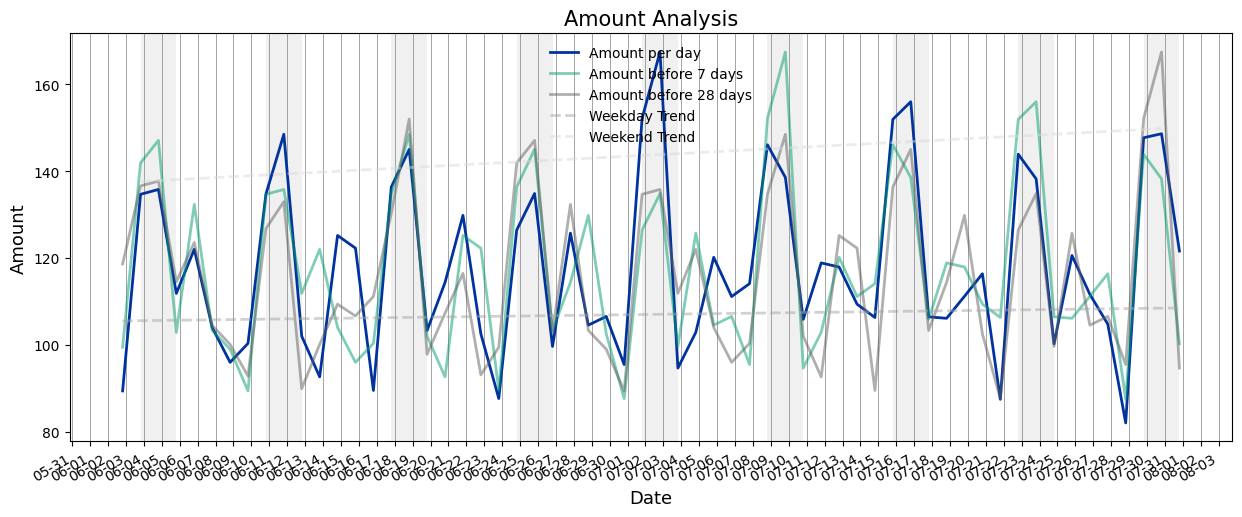

In [3]:
# mckinsey studio theme

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from scipy.stats import linregress

# Data
date_rng = pd.date_range(start=dt.datetime.now() - dt.timedelta(days=90), end=dt.datetime.now(), freq='D')
df = pd.DataFrame(date_rng, columns=['date'])
df['weekday'] = df['date'].dt.day_name()
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])
df['amount'] = 100 + np.random.randn(len(df)) * 10
df.loc[df['is_weekend'], 'amount'] += 50
df['amount'] += 10 * np.sin(df['date'].dt.dayofweek * 2 * np.pi / 7)
df['amount_7_days'] = df['amount'].shift(7)
df['amount_28_days'] = df['amount'].shift(28)
plot_df = df[df['date'] >= (dt.datetime.now() - dt.timedelta(days=60))]

# Plotting
plt.figure(figsize=(15,6), facecolor='white')

# McKinsey color palette
colors = ['#0033A0', '#009D70', '#606060', '#A5A5A5', '#D9D9D9']

# Highlight Saturdays and Sundays
for idx, row in plot_df.iterrows():
    if row['is_weekend']:
        plt.axvspan(row['date'], row['date'] + dt.timedelta(days=1), facecolor='#F0F0F0')

plt.plot(plot_df['date'], plot_df['amount'], label='Amount per day', linewidth=2, color=colors[0])
plt.plot(plot_df['date'], plot_df['amount_7_days'], label='Amount before 7 days', linewidth=2, alpha=0.5, color=colors[1])
plt.plot(plot_df['date'], plot_df['amount_28_days'], label='Amount before 28 days', linewidth=2, alpha=0.5, color=colors[2])

def plot_trend(x, y, color, label):
    slope, intercept, _, _, _ = linregress(x, y)
    plt.plot(x, slope * x + intercept, label=label, linewidth=2, linestyle='--', alpha=0.5, color=color)

weekday_df = plot_df[~plot_df['is_weekend']]
weekend_df = plot_df[plot_df['is_weekend']]
x_weekday = mdates.date2num(weekday_df['date'])
x_weekend = mdates.date2num(weekend_df['date'])
plot_trend(x_weekday, weekday_df['amount'], colors[3], 'Weekday Trend')
plot_trend(x_weekend, weekend_df['amount'], colors[4], 'Weekend Trend')

plt.legend(fontsize='medium', frameon=False)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Amount', fontsize=13)
plt.title('Amount Analysis', fontsize=15)
plt.grid(axis='x', linestyle='-', linewidth=0.5, color='gray')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()

plt.show()